LeNet-5神经网络的搭建

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        # 构建网络
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,stride=1)
        self.pool1=nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1)
        self.pool2=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1=nn.Linear(256,120)
        self.fc2=nn.Linear(120,10)
    # 前向传播
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=self.pool1(x)
        x=F.relu(self.conv2(x))
        x=self.pool2(x)
        x=x.view(x.size(0),-1)
        #print(x.shape)
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return x
    

加载数据集

In [3]:
# 数据预处理
transform=transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.5,),(0.5,)),
                            transforms.RandomHorizontalFlip(p=0.5),
                            transforms.RandomVerticalFlip(p=0.5),
                            ])
# 加载数据训练集
trainset=torchvision.datasets.FashionMNIST(root='./DATASET',train=True,download=False,transform=transform)
trainload=torch.utils.data.DataLoader(trainset,shuffle=True,batch_size=100,num_workers=0)
# 加载测试数据集
testset=torchvision.datasets.FashionMNIST(root='./DATASET',train=False,download=False,transform=transform)
testload=torch.utils.data.DataLoader(testset,shuffle=True,batch_size=100,num_workers=0)

classes=('T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [4]:
# 数据获取迭代器
dataiter=iter(trainload)
imgs,labels=next(dataiter)

In [5]:
#查看输入数据的shape
print(imgs.shape)

torch.Size([100, 1, 28, 28])


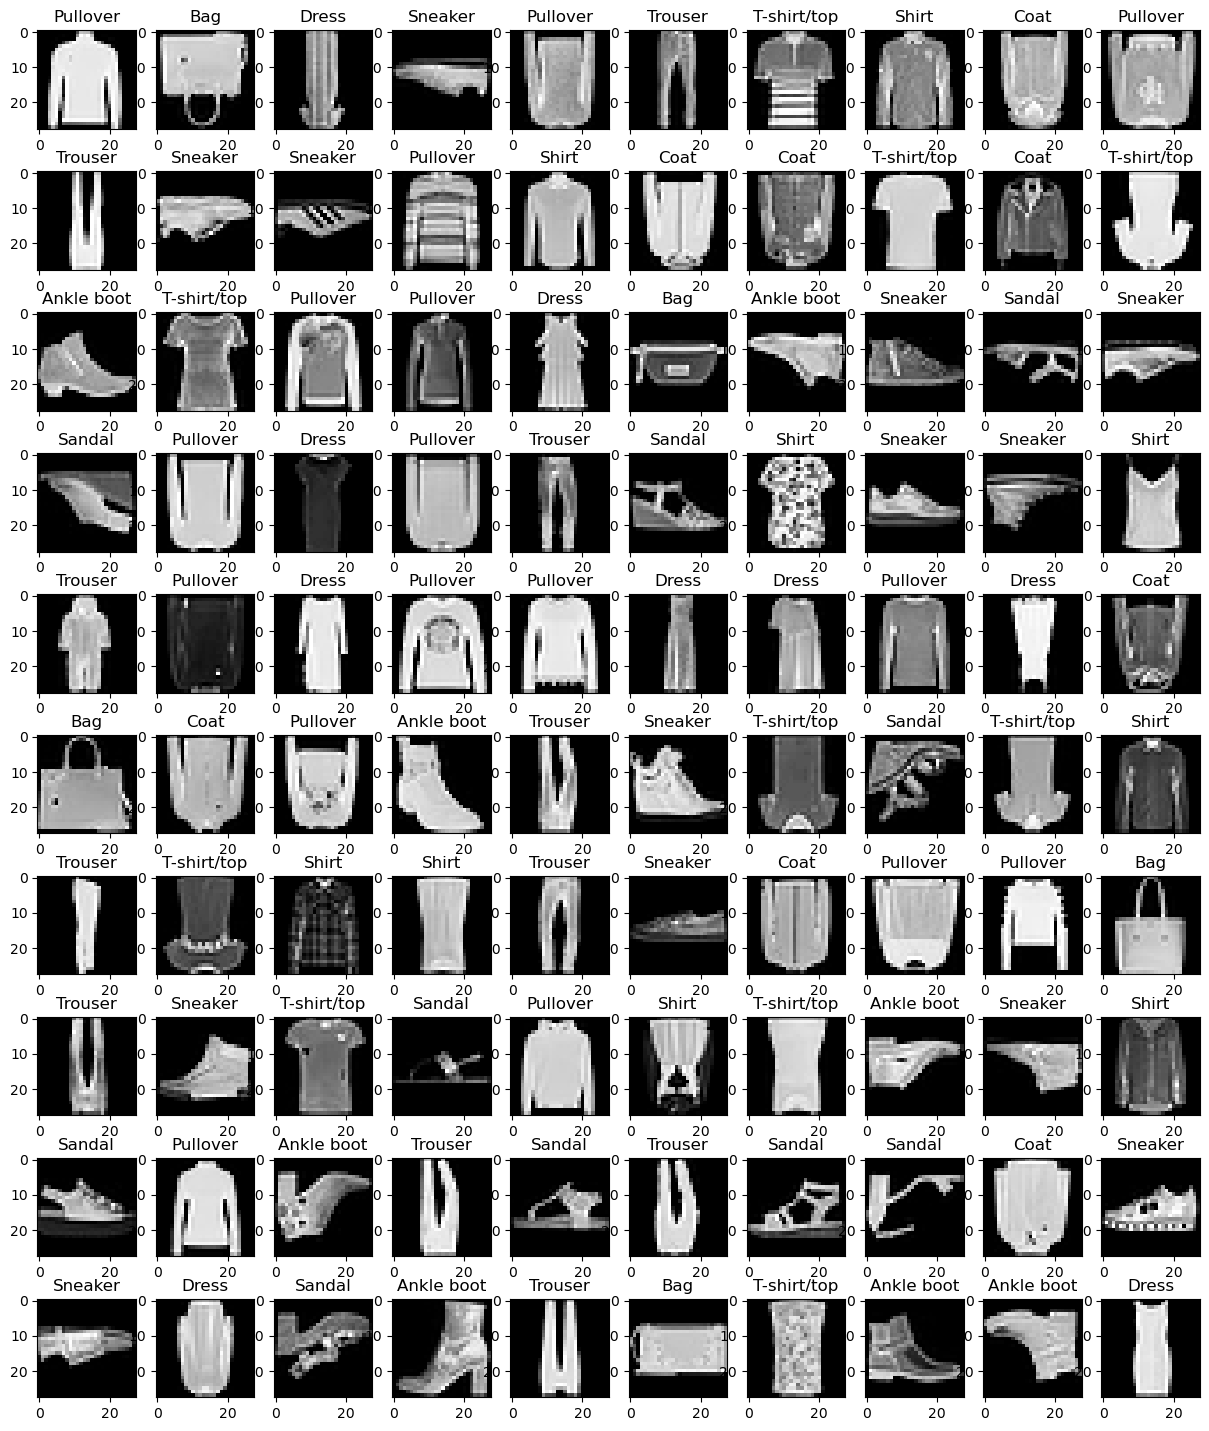

In [6]:
# 显示部分图像
row=10
column=10
pos=1
plt.figure(figsize=(15,18))
for i in range(row):
    for j in range(column):
        plt.subplot(row,column,pos)
        plt.imshow(imgs[pos-1].numpy().squeeze(),cmap='gray')
        plt.title(classes[labels[pos-1].item()])
        pos+=1

In [7]:
# 训练模型 
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 构建网络
net=LeNet()
net=net.to(device)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(),lr=0.001)
# 开始训练

for epoch in range(10):
    running_loss=0
    correct=0
    total=0
    for i,data in enumerate(trainload,start=0):
        inputs,labels=data
        inputs,labels=inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs=net(inputs)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()

        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()

        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    # 计算并打印每个 epoch 的正确率
    accuracy = 100 * correct / total
    print('Accuracy after epoch %d: %.2f%%' % (epoch + 1, accuracy))



[1,   100] loss: 1.387
[1,   200] loss: 0.841
[1,   300] loss: 0.724
[1,   400] loss: 0.674
[1,   500] loss: 0.646
[1,   600] loss: 0.611
Accuracy after epoch 1: 69.90%
[2,   100] loss: 0.591
[2,   200] loss: 0.559
[2,   300] loss: 0.567
[2,   400] loss: 0.535
[2,   500] loss: 0.520
[2,   600] loss: 0.521
Accuracy after epoch 2: 79.74%
[3,   100] loss: 0.497
[3,   200] loss: 0.499
[3,   300] loss: 0.473
[3,   400] loss: 0.477
[3,   500] loss: 0.467
[3,   600] loss: 0.468
Accuracy after epoch 3: 82.50%
[4,   100] loss: 0.447
[4,   200] loss: 0.453
[4,   300] loss: 0.450
[4,   400] loss: 0.437
[4,   500] loss: 0.421
[4,   600] loss: 0.427
Accuracy after epoch 4: 84.12%
[5,   100] loss: 0.411
[5,   200] loss: 0.410
[5,   300] loss: 0.417
[5,   400] loss: 0.395
[5,   500] loss: 0.412
[5,   600] loss: 0.407
Accuracy after epoch 5: 85.16%
[6,   100] loss: 0.402
[6,   200] loss: 0.380
[6,   300] loss: 0.400
[6,   400] loss: 0.390
[6,   500] loss: 0.382
[6,   600] loss: 0.385
Accuracy after ep

测试模型

In [8]:
total_test=0
correct_test=0
with torch.no_grad():
    for data in testload:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        # torch.max(outputs.data, 1)返回outputs每一行中最大值的那个元素，且返回其索引
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 87 %


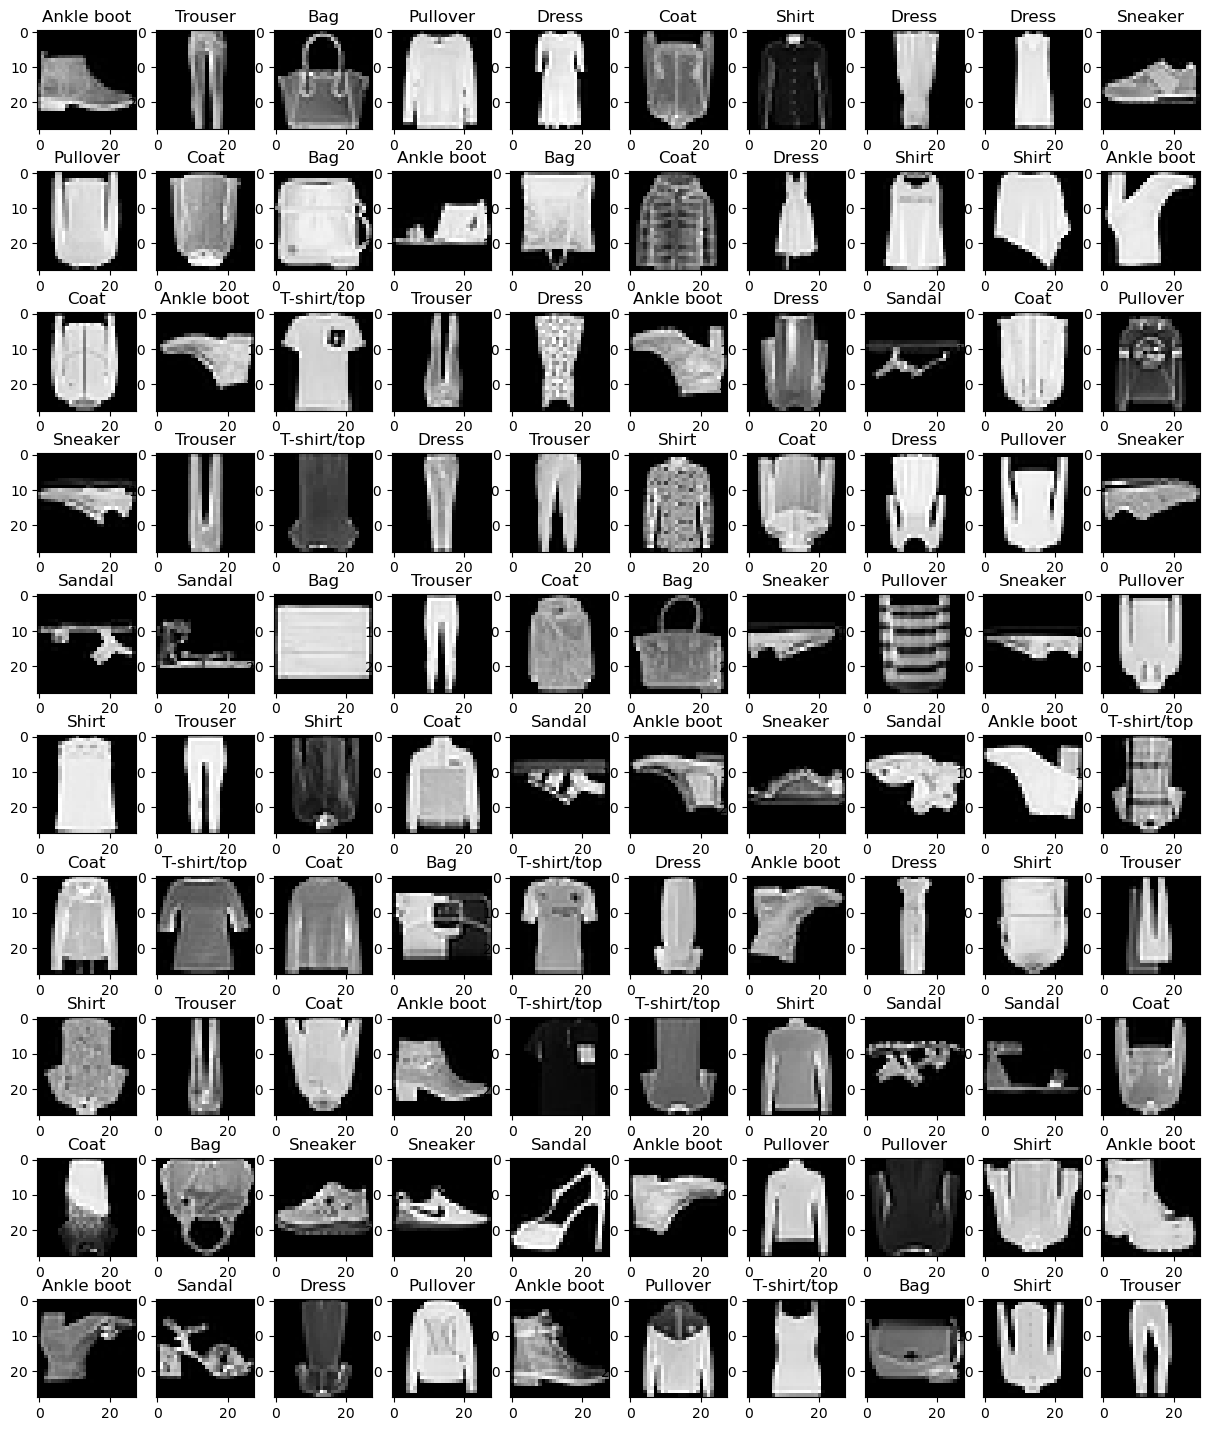

In [9]:
#把predict_list转换为numpy
predicted = predicted.cpu()
preds = predicted.numpy()
images = images.cpu()
#打印部分预测结果
plt.figure(figsize=(15,18))
pos = 1
for i in range(row):
    for j in range(column):
        plt.subplot(row,column,pos)
        plt.imshow(images[pos-1].numpy().squeeze(),cmap='gray')
        plt.title(classes[preds[pos-1]])
        pos+=1

In [12]:
# 测试模型

net.eval()
correct = 0
total = 0
TN,TP,FN,FP=np.zeros(10),np.zeros(10),np.zeros(10),np.zeros(10)
# 不进行梯度计算，加快预测速度
with torch.no_grad():
    for data in testload:
        images, labels = data
        #print(images.shape)
        inputs = images
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        #获取预测的类别
        _, predicted = torch.max(outputs.data, 1)
        
        '''
        Weight-average:对每类的评价指标进行加权求和,求得整个的评价指标
        计算每个类别的准确率、召回率、F1值
        然后对每个类别的评价指标进行加权求和，求得整个的评价指标
        TP:预测为正例的样本中，实际为正例的样本数
        FN:预测为负例的样本中,实际为正例的样本数
        FP:预测为正例的样本中,实际为负例的样本数
        TN:预测为负例的样本中,实际为负例的样本数
        '''
        TN += labels.shape[0];
        for i in range(predicted.shape[0]):
            #预测成功(预测为正例且实际为正例，或者预测为负例且实际为负例)
            if predicted[i] == labels[i]:
                #对于标签为predicted[i]的类别(TP)和其他类别(TN)来说都预测成功
                TP[predicted[i]]+=1
                TN[predicted[i]]-=1
            #预测失败（预测为正例但实际为负例，或者预测为负例而实际为正例）
            else:
                #对标签为predicted[i]的类别(FP),对于标签为labels[i]的类别(FN)
                FP[labels[i]]+=1
                FN[predicted[i]]+=1
                TN[labels[i]]-=1
                TN[predicted[i]]-=1
        
# 计算准确率，召回率，F1值
total=TP+FP+FN+TN
print('total:',total)  
accuracy = (TP + TN) / total
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall) 
weight=total/total.sum()
print(weight)
total_accuracy=np.sum(accuracy*weight)
total_precision=np.sum(precision*weight)
total_recall=np.sum(recall*weight)
total_f1=np.sum(f1*weight)
print('Accuracy: %.3f' % total_accuracy)
print('Precision: %.3f' % total_precision)
print('Recall: %.3f' % total_recall)
print('F1 score: %.3f' % total_f1)

total: [10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Accuracy: 0.973
Precision: 0.867
Recall: 0.867
F1 score: 0.866


存储参数

In [21]:
save_path = './ckpt/Lenet1.pth'
torch.save(net.state_dict(), save_path)

预测图片

Trouser


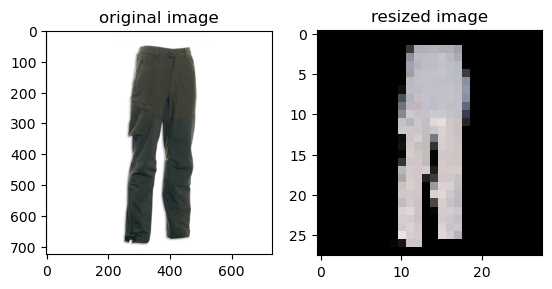

In [32]:
import cv2
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
#加载模型
path = './ckpt/Lenet1.pth'
model = LeNet()
model.load_state_dict(torch.load(path))
#预测图片
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
                                transforms.Resize((28,28)),
                                #转化为灰度图
                                transforms.Grayscale(num_output_channels=1)
                                ])
im = cv2.imread('./source/trouser2.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#预处理图片
resized_image = cv2.resize(im, (28, 28))
resized_image = 255 - resized_image
input = transform(im)  
#增加一个维度
input = input.unsqueeze(0)
# 把im转化为tensor
input = input.clone().detach().requires_grad_(True)
plt.subplot(1,2,1)
plt.imshow(im)
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(resized_image)
plt.title('resized image')

with torch.no_grad():
    outputs = model(input)
    _, predict = torch.max(outputs.data, 1) # 索引即classed中的类别
print(classes[predict])